In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv("fashion_train_data.csv")

In [3]:
df_test = pd.read_csv("fashion_test_data.csv")

In [4]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
xtrain = df_train.drop('label', axis='columns')

In [6]:
xtrain.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
xtrain.shape

(10000, 784)

In [8]:
ytrain = df_train['label']

In [9]:
xtest = df_test.drop('label', axis='columns')
ytest = df_test['label']

In [10]:
classes = [' T_shirt', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

In [11]:
ytrain.shape

(10000,)

In [12]:
ytrain.head()

0    0
1    1
2    2
3    2
4    3
Name: label, dtype: int64

In [13]:
ytrain.dtypes

dtype('int64')

In [14]:
def plt_sample(x, y, index):
    img = np.array(x.iloc[index])
    img = img.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.xlabel(classes[y[index]])
    plt.show()

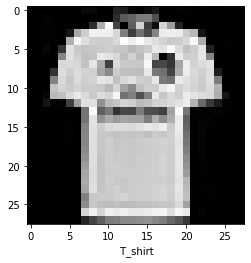

In [15]:
plt_sample(xtrain, ytrain, 0)

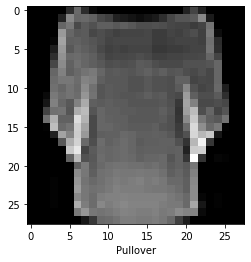

In [16]:
plt_sample(xtrain, ytrain, 5)

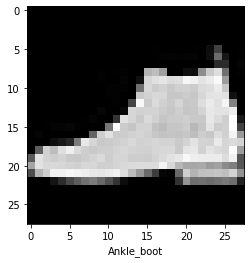

In [17]:
plt_sample(xtrain, ytrain, 100)

In [18]:
xtrain/255

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.035294,0.031373,0.000000,...,0.403922,0.341176,0.219608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.054902,0.207843,0.388235,0.066667,...,0.000000,0.000000,0.000000,0.000000,0.247059,0.207843,0.121569,0.000000,0.000000,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.631373,...,0.537255,0.494118,0.549020,0.000000,0.521569,0.878431,0.870588,0.219608,0.000000,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.145098,...,0.125490,0.090196,0.054902,0.078431,0.000000,0.000000,0.003922,0.000000,0.000000,0.0
9996,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.007843,0.203922,0.090196,0.109804,0.000000,0.000000,0.0
9997,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.686275,0.674510,0.674510,0.713725,0.780392,0.870588,0.164706,0.000000,0.003922,0.0
9998,0.0,0.003922,0.011765,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.0


In [19]:
#Normalize the value
xtrain = xtrain/255
xtest = xtest/255

In [20]:
ytrain.value_counts()

0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: label, dtype: int64

In [21]:
ann = models.Sequential([
    layers.Dense(700, activation='relu'),
    layers.Dense(400, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(xtrain, ytrain, epochs=50)
#when there is hot encoded use categorical for y and when number use sparse categorical

Epoch 1/50
313/313 [==============================] - 6s 13ms/step - loss: 1.1622 - accuracy: 0.6436
Epoch 2/50
313/313 [==============================] - 4s 13ms/step - loss: 0.6838 - accuracy: 0.7696
Epoch 3/50
313/313 [==============================] - 4s 13ms/step - loss: 0.5846 - accuracy: 0.8016
Epoch 4/50
313/313 [==============================] - 4s 13ms/step - loss: 0.5347 - accuracy: 0.8135
Epoch 5/50
313/313 [==============================] - 4s 13ms/step - loss: 0.5051 - accuracy: 0.8264
Epoch 6/50
313/313 [==============================] - 4s 13ms/step - loss: 0.4783 - accuracy: 0.8344
Epoch 7/50
313/313 [==============================] - 4s 12ms/step - loss: 0.4596 - accuracy: 0.8381
Epoch 8/50
313/313 [==============================] - 4s 13ms/step - loss: 0.4442 - accuracy: 0.8429
Epoch 9/50
313/313 [==============================] - 4s 13ms/step - loss: 0.4288 - accuracy: 0.8522
Epoch 10/50
313/313 [==============================] - 4s 13ms/step - loss: 0.4142 - accura

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(xtest)
y_pred = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(ytest, y_pred))

313/313 [==============================] - 2s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1000
           1       1.00      0.99      1.00      1000
           2       0.95      0.88      0.91      1000
           3       0.99      0.96      0.97      1000
           4       0.89      0.93      0.91      1000
           5       0.99      1.00      0.99      1000
           6       0.87      0.93      0.89      1000
           7       1.00      0.96      0.98      1000
           8       1.00      1.00      1.00      1000
           9       0.97      1.00      0.98      1000

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [27]:
xtrain.shape

(10000, 784)